In [1]:
import sys

sys.path.append("..")

from common.utility import show_implementation
import matplotlib.pyplot as plt
import numpy as np

# Perceptron (Classification)

Perceptron is a single layer neural network.

It is designed to solve pattern recognition problem, where we classify a set of inputs $x_1 \dots x_n$ into 2 classes, $C_1, C_2$.

Squash function is always hard limiter $\rightarrow$ output is either 1 or 0

When induced local field $v(n) = w^T(n)(x(n) > 0$, it results in an output of $y(n) = 1$, and we group this as a class 1 classification. And it is a class 2 classification when $v(n) = w^T(n)(x(n) < 0$

If induced local field is 0, then this is a decision boundary.

## Geometric shape of Decision Boundary

If m = 1, $w_1 x_1 + b = 0 \rightarrow $ a point on the line

If m = 2, $w_1 x_1 + w_2x_2 + b = 0 \rightarrow $ a line on a 2D plane

If m = 3, $w_1 x_1 + w_2x_2 + w_3x_3 + b = 0 \rightarrow $ a plane on a 3D plane 

$w_1 x_1 + w_2x_2 \dots w_mx_m + b = 0 \rightarrow $ a hyperplane on a m-dimensional plane 

### Linearity of Decision Boundary
Notice that for all values of m, the variables $x_i$ are all linear.
This means that our decision boundary must be linear.



## How to choose weights
The weights directly affect the decision boundary, thus we require a method to produce proper weights to solve the problem.

The methods are:
* Offline calculation of weights
* Learning of weights

### Offline weights calculation
Suppose we are solving the problem of a OR gate, with the following logic table. Assume that we wish to solve this as a classification problem.

|$$x_1$$|$$x_2$$|y  |
|-----|-----|---|
|  0  |  0  |0  |
|  0  |  1  |1  |
|  1  |  0  |1  |
|  1  |  1  |1  |

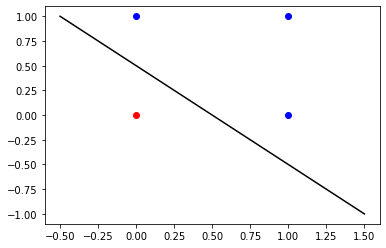

In [2]:
pts = [(0, 0), (0, 1), (1, 0), (1, 1)]

xs = np.linspace(-0.5, 1.5, 100)
ys = -xs + 0.5

for (x, y) in pts:
    plt.scatter([x], [y], color="red" if (x, y) == (0, 0) else "blue")
plt.plot(xs, ys, "-k")
plt.show()



If we look at the graph, we notice that this is one possible decision boundary

$x_2 = -x_1 + 0.5 \Rightarrow x_1 + x_2 - 0.5 = 0$

Thus, $w_0, w_1, w_2 = -0.5, 1, 1$


---

Now, we will look at the implementation of the classical perceptron.

In [3]:
from module.perceptron import Perceptron
from module.classical_perceptron import ClassicalPerceptron
from module.activation_function import HardLimiter

show_implementation(Perceptron)
show_implementation(ClassicalPerceptron)
show_implementation(HardLimiter)

class Perceptron:

    def __init__(self, size, activation_function, weights=None):
        if weights is None:
            weights = np.random.rand(size+1) * 2 -1
        weights = np.array(weights)
        assert weights.shape == (size+1,)
        self.weights = weights
        self.size = size
        self.activation_function = activation_function
        
    def induce_field(self, input):
        input = np.array(input)
        assert input.shape == (self.size,)
        input = np.insert(input, 0, 1)
        return self.weights.T @ input
    
    def squash(self, induced_field):
        return self.activation_function.apply(induced_field)
    
    def get_output(self, input):
        field = self.induce_field(input)
        output = self.squash(field)
        return output
class ClassicalPerceptron(Perceptron):

    def __init__(self, size, weights=None):
        super().__init__(size, HardLimiter(), weights)
class HardLimiter:

    def apply(self, induced_field):
        return 0

In [4]:
p = ClassicalPerceptron(2, [-0.5, 1, 1])

inputs = [[0, 0], [0, 1], [1, 0], [1, 1]]

labels = [0, 1, 1, 1]

for input, label in zip(inputs, labels):
    print(f"inputs: {input}, output: {p.get_output(input)}, correct label: {label}")

inputs: [0, 0], output: 0, correct label: 0
inputs: [0, 1], output: 1, correct label: 1
inputs: [1, 0], output: 1, correct label: 1
inputs: [1, 1], output: 1, correct label: 1


As we can see, this properly separates our inputs into 2 classes.

Now, suppose we trying to solve the NOR problem instead. <a id="nor_gate"></a>

| $$x_1$$ | $$x_2$$ |y  |
|:---:|:---:|:---:|
|  0  |  0  |1  |
|  0  |  1  |0  |
|  1  |  0  |0  |
|  1  |  1  |0  |

Notice that the decision boundary will be the same as the previous one.

However, we cannot reuse the weights because the signs will be wrong.

The correct weights are $-x_1 - x_2 + 0.5 = 0$.

However, for pattern recognition problem, we are not focused on the sign of the value of the output, but are simply aiming to separate the classes into different groups, thus both weights would work.

**Linearly Separable**: when two classes can be separated by a line/plane/hyper-plane

Notice that even though the examples are simple, once we start increasing the dimension, it becomes infeasible to find the boundary by hand.



### Perceptron Learning
Thus, to solve problems with higher dimension, we can turn to perceptron learning

Suppose the classes $C_1$ and $C_2$ are linearly separable, there must exist some weight vector $w_0$ such that

$$w_0^Tx>0 \text{ for } \forall x \in C_1$$

$$w_0^Tx<0 \text{ for } \forall x \in C_2$$ 

We wish to find $w_0^T$ such that it can correctly classify the training set X.

We can do so simply by **trial and error**.

#### Learning Algorithm
Suppose for a given weight, the output y is 0 while the correct label d is 1.

We wish to find a new weight vector $w' = w + \Delta w$ such that the induced local field is closer to 1, meaning $v'-v = w'^T x - w^T x = \Delta w^T x > 0$.

A simple vector $\Delta w$ that satisfy this relation is $x$, because $\Delta w ^T x = x^T x$ is always $\geq 0$

To prevent adjusting the weights "too much", we need a learning rate factor $\eta$ which reduces the amount the weights are updated

Thus, we need to update the weights to $w' = w + \eta x$

If we do the same for when the label is 0 and the output is 1, we would obtain the weight update to be $w' = w - \eta x$

To generalize these 2 cases, consider the error signal $e = d - y$.
We obtain a general learning weight update value of $w' = w + \eta e x$

1. Initialize w(1) arbritrarily
2. Feed a pattern x to the perceptron to produce a binary output y
3. Compute error signal, $e(n) = d(n) - y(n) $
4. Update weights, $w(n+1) = w(n) + \eta e(n) x(n)$
5. Repeat 2-4 until the weights no longer change

**Note:** The weights are updated once for every input

In [5]:
from module.learning_perceptron import LearningPerceptron

show_implementation(LearningPerceptron)

class LearningPerceptron(Perceptron):

    def __init__(self, size, activation_function, weights=None, learning_rate=1):
        if weights is None:
            weights = np.random.rand(size+1)*2-1
        weights = np.array(weights)
        assert weights.shape == (size+1,)
        super().__init__(size, activation_function, weights=weights)
        self.learning_rate = learning_rate

    def calculate_error(self, input, correct_label):
        return correct_label - self.get_output(input)
    
    def update_weights(self, input, error):
        self.weights = self.weights + self.learning_rate * error * np.insert(input, 0, 1)
        
    def train(self, input, correct_label):
        input = np.array(input)
        error = self.calculate_error(input, correct_label)
        self.update_weights(input, error)
        
    def train_epoch(self, inputs, labels, epochs=5):
        assert len(inputs) == len(labels)
        for _ in range(epochs):
            prev_weights = self.weights
    

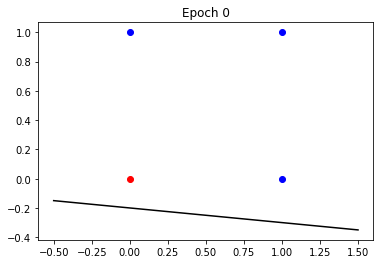

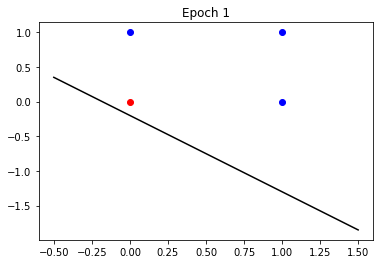

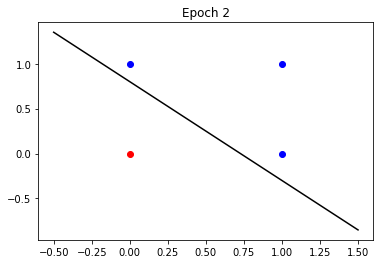

In [6]:
p = LearningPerceptron(2, HardLimiter(), [0.2, 0.1, 1])

inputs = [[0, 0], [0, 1], [1, 0], [1, 1]]

labels = [0, 1, 1, 1]

xs = np.linspace(-0.5, 1.5, 100)
pts = [(0, 0), (0, 1), (1, 0), (1, 1)]

for epoch in range(10):
    prev_weights = p.weights

    fig = plt.figure()

    ax = fig.add_subplot(111)

    ys = (p.weights[1] * xs + p.weights[0]) / -p.weights[2]

    for (x, y) in pts:
        plt.scatter([x], [y], color="red" if (x, y) == (0, 0) else "blue")

    ax.set_title(f"Epoch {epoch}")

    plt.plot(xs, ys, "-k")
    plt.show()

    for input, label in zip(inputs, labels):
        p.train(input, label)

    if np.array_equal(prev_weights, p.weights):
        break

#### Proof of Convergence
If the classes are linearly separable (there exists a $w_0$ which classifies the classes correctly), we can prove that this algorithm will converge to the solution in a fixed number of steps.

Suppose w(1) = 0 and $\eta = 1$.

$w(n+1) = w(n) + e(n)x(n)$

$w(2) = e(1)x(1)$

$w(3) = e(1)x(1) + e(2)x(2)$

$w(n+1) = \sum _ {i=0} ^ n e(i)x(i)$

Project both side along the direction of $w_0$, the theoretical weights that could solve the problem

$w_0 ^ T w(n+1) = \sum _ {i=0} ^ n w_0 ^ T e(i)x(i)$

Consider a certain term k in the summation

$w_0 ^ T e(k)x(k) = e(k) w_0 ^ T x(k)$

When $w_0^T x(k) > 0$, this means that the correct label is 1. Since this k-th term appeared in the summation, it must mean that the perceptron classified it wrongly, thus $d(k) = 1 , y(k) = 0$. 

Finally, we get $e(k) = 1 \Rightarrow e(k) w_0 ^ T x(k)  > 0$

When $w_0^T x(k) < 0 \Rightarrow d(k) = 0 , y(k) = 1 \Rightarrow e(k) = -1 \Rightarrow e(k) w_0 ^ T x(k)  > 0$ 

Let $\alpha = \{\min w_0^Tx(k)\}$

We obtain that $w_0 ^ T w(n+1) \geq n \alpha$

By Cauchy-Schwarz inequality "$||x||||y|| \geq |x^Ty|$", we get 

$$w_0 ^ T w(n+1) \leq ||w_0|||w(n+1)||$$

Thus, 

$$||w_0||||w(n+1)|| \geq w_0 ^ T w(n+1) \geq n\alpha$$

$$||w(n+1)|| \geq \frac{n\alpha}{||w_0||}$$


Now, suppose we look at $||w(n+1)||^2$ instead.

$||w(n+1)||^2 = w^T(n+1) w(n+1)$

$= (w(n)+e(n)x(n))^T(w(n)+e(n)x(n))$

$= w^T(n)w(n) + 2e(n)w^T(n)x(n) + e^2(n)x^T(n)x(n)$

We now focus on $e(n)w^T(n)x(n)$.

$e(n)w^T(n)x(n) = (d(n)-y(n)) w^T(n)x(n)$

If $w^T(n)x(n) > 0 \Rightarrow y(n) = 1, d(n) = 0 \Rightarrow e(n)w^T(n)x(n) < 0$

If $w^T(n)x(n) < 0 \Rightarrow y(n) = 0, d(n) = 1 \Rightarrow e(n)w^T(n)x(n) < 0$

Thus, $||w(n+1)||^2  - ||w(n)||^2 =  w^T(n)w(n)  + 2e(n)w^T(n)x(n) + e^2(n)x^T(n)x(n) -  w^T(n)w(n) $

$= 2e(n)w^T(n)x(n) + ||x(n)|| \leq ||x(n)||^2$

It follows that

$$||w(2)||^2 - ||w(1)||^2 \leq ||x(1)||^2$$

$$||w(3)||^2 - ||w(2)||^2 \leq ||x(2)||^2$$

$$||w(n+1)||^2 - ||w(n)||^2 \leq ||x(n)||^2$$

Summing all the inequalities, we get $||w(n+1)||^2 - ||w(n)||^2  \leq \sum _{i=1} ^ n ||x(i)||^2$

Let $\beta = \max {||x(i)||^2}$, we get $||w(n)||^2 \leq n\beta$

Combined with the previous inequality we got $||w(n+1)|| \geq \frac{n\alpha}{||w_0||} \Rightarrow ||w(n+1)||^2 \geq \frac{n^2\alpha^2}{||w_0||^2}$

$$\frac{n^2\alpha^2}{||w_0||^2}\leq ||w(n)||^2 \leq n \beta $$

In this case, notice that if the weights change forever, this means that $n \rightarrow \infty$. However, because the LHS grows at the rate of $n^2$ while the RHS grows at the rate of n, the inequality will not hold. Therefore, n cannot approach infinity, and thus, the weights will converge.

#### Impact of Learning Rate $\eta$

If $\eta$ is too large, then learning will be quick for the current input, but it may cause it to "unlearn" what it has learnt in the previous input, leading to slower convergence.

Similarly, if $\eta$ is too small, it will learn the current input slowly, which also lead to a slower convergence.

Thus, we need to choose an appropritate learning rate, which have to be determined by a problem-by-problem basis.

# Perceptron (Regression)

Suppose that we wish to find the relationship of multiple input variables $x_1\dots x_m$ to a certain output variables $d$.
And we have a set of observations of input-output data $\{\vec x(i), d(i)\}$

We can use a perceptron to solve this problem also.

## Cost Function
Suppose that our perceptron gave a model that has error $e(i)$ compared each data point.

A common cost function is the sum of squared errors, $E(w) = \sum_{i=1} ^ n e (i)^2$

This is used over $E(w) = \sum_{i=1} ^ n |e (i)|$ because it has the added benefit of being differentiable.

## Gradient Descent
Thus, our goal is to find a weight vector $\vec w$ such that the cost function $E(\vec w)$ is minimized

Notice that we require $\nabla E(\vec w) = 0$, where $\nabla$ is the gradient operator $[\frac{\partial}{\partial w_0}, \dots \frac{\partial}{\partial w_m}]^T$, since the rate of change must be 0 at the minimal point.

Since solving $\nabla E(\vec w) = 0$ may be difficult, we use an iterative algorithm to find the minimal point instead.

Suppose we have a certain $\vec w(n)$. 
We can calculate the gradient of the error at this point with respect to each of the variables, $\vec g(n) = \nabla E(\vec w(n))$. 
Since the gradient indicates the direction which the function increases the quickest, we would wish to move in the direction opposite of the gradient to reduce the cost.

Thus, intuitively, the update to the weights should be $\Delta \vec w(n) = -\eta \vec g(n)$ and 

$$ \vec w(n+1) =  \vec w(n) - \eta \vec g(n)$$

---

### Proof that using $\nabla E(\vec w(n))$ reduces error


Consider $E(\vec w(n+1))$

$$
\begin{align}
E(\vec w(n+1)) &= E(\vec w(n)+\Delta \vec w(n)) &\\
&\approx E(\vec w(n)) + \frac{\partial E}{\partial \vec w} \Delta \vec w(n) \quad &\text{ By Taylor Series approximation, assuming $\Delta \vec w(n)$ is small} \\
&= E(\vec w(n)) + (\nabla E(\vec w))^T \Delta \vec w(n) \quad \quad  &(\nabla E(\vec w))^T = \frac{\partial E}{\partial \vec w} \quad \text{by their definitions} \\
&= E(\vec w(n)) + (\nabla E(\vec w))^T ( - \eta \vec g(n))\\
&= E(\vec w(n)) - \eta \vec g(n)^T  \vec g(n)\\
&= E(\vec w(n)) - \eta ||\vec g(n)|| <  E(\vec w(n)) & \text {QED}
\end{align}
$$

---

Note that since we require $\Delta \vec w(n)$ to be small, we need to small $\eta$ so that our assumptions to be satisified.

### Algorithm

1. Initialize $ \vec w(0)$ arbitrarily
2. Update  $ \vec w(n+1) =  \vec w(n) - \eta \vec g(n)$
3. Repeat until convergence




## Linear Regression
### Definition
Given observations of input data $\{\vec x_1, \dots, \vec x_m\}$, output data $\vec d$ where there are m variables and n observations, $\vec x$ and $\vec w$  will $m \times 1$, $\vec d$ and $\vec y$ are $n \times 1$.

We wish to find $\vec w$ such that

$$E(\vec w) = \sum e^2 = \sum (d_i - y_i)^2 \text{ is minimized}$$

where

$$y_i =  \vec w^T \vec x_i$$


### Optimality
Since we are trying to find the weights that gives the minimum error, we wish to find $\vec w(n)$ such that $\frac{\partial E}{\partial \vec w(n)} = \vec 0$


### Standard Least Square
We can solve this linear regression directly.

Rewrite 

$$y_i =  \vec w^T \vec x_i = \vec x_i \vec w^T$$

$$\vec y =   \begin{pmatrix}
x_1 ^T \\
\dots \\
x_n ^T
\end{pmatrix} \vec w = \vec X \vec w$$

We call $\vec X$ the regression matrix


Observe that $E(\vec w) = \sum e^2 = \vec e^T \vec e$ and $\vec e = \vec d - \vec y = \vec d - \vec X \vec w$

$$
\frac{\partial E}{\partial \vec w} = \frac{\partial E}{\partial \vec e} \frac{\partial \vec e}{\partial \vec w} = (2\vec e ^T)(-\vec X)= -2\vec e^TX
$$

Set $\frac{\partial E}{\partial w} = 0$

$$
-2\vec e^T \vec X = \vec 0 = \vec e^T \vec X
$$

$$
\vec e^T \vec X = (\vec d - X \vec w)^T \vec X =  \vec d ^T\vec X - \vec w^T \vec X^T \vec X = \vec 0
$$

$$
\Rightarrow \vec d ^T \vec X = \vec w^T X^T \vec X \\
\Rightarrow \vec w^T =  \vec d ^T \vec X (\vec X^T \vec X)^{-1} \\
\Rightarrow \vec w =  (\vec X^T \vec X)^{-1} \vec X^T \vec d
$$

(Note: This is the same solution we obtain via [linear algebra](../linear_algebra/orthogonal_projection.ipynb#Least-squares-approximation))

### Example
Suppose we wish to fit the following data, where there is only 1 variable and 5 observations

|  x  |  d  |
|:---:|:---:|
|  3  | 3.5 |
| 3.5 | 2.5 |
|  5  |  2  |
| 5.5 |  1  |
|  6  |  1  |


$$
\begin{align*}
w &= \left(\begin{pmatrix}1 & 1 & 1 & 1& 1 \\ 3 & 3.5 & 5 & 5.5 & 6\end{pmatrix}  \begin{pmatrix}1 & 3 \\ 1 & 3.5 \\ 1 & 5 \\ 1 & 5.5 \\ 1 & 6\end{pmatrix}\right)^{-1} \begin{pmatrix}1 & 1 & 1 & 1& 1 \\ 3 & 3.5 & 5 & 5.5 & 6\end{pmatrix} \begin{pmatrix}3.5 \\ 2.5 \\ 2 \\ 1 \\ 1\end{pmatrix}\\
&= \begin{pmatrix} 5.60 \\-0.78 \end{pmatrix} = \begin{pmatrix} b \\ w \end{pmatrix}
\end{align*}
$$

[ 5.60447761 -0.78358209]


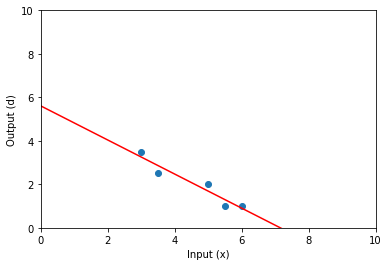

In [7]:
pts = [([3], 3.5), ([3.5], 2.5), ([5], 2), ([5.5], 1), ([6], 1)]

f, ax = plt.subplots(1)
xdata, ydata = zip(*pts)
ax.scatter(xdata, ydata)
ax.set_ylim(ymin=0, ymax=10)
ax.set_xlim(xmin=0, xmax=10)
ax.set_ylabel("Output (d)")
ax.set_xlabel("Input (x)")

bias = np.ones((len(pts), 1))
X = np.append(bias, np.array(xdata), axis=1)
d = np.array(ydata)
w = np.linalg.inv(X.T @ X) @ X.T @ d

xs = np.linspace(0, 10, 100)
ys = w[1] * xs + w[0]
plt.plot(xs, ys, "-r")
print(w)
plt.show(f)

As you can see, the line does resemble the best fit line.

### Issues
Notice that the regression matrix is $n \times (m+1)$.

This means that to compute $w$, we would need to store $n(m+1)$ entries in memory.

If n and m is large, this becomes infeasible.

---

### Perceptron
Suppose we use a perceptron to solve the problem.

We would need to replace the activation function (hard limiter) with a linear function, so that we can get a range of values as the output rather than it being binary.

Suppose our cost function is $E(\vec w) = \frac{1}{2} e^2(n)$, where $e(n) = d(n) - \vec x^T(n) \vec w(n)$

$$
\frac{\partial E}{\partial \vec w} = \frac{\partial E}{\partial \vec e} \frac{\partial \vec e}{\partial \vec w} = e(n)(-\vec x^T(n))
$$
$$
g(n) = (\frac{\partial E(w)}{\partial \vec w(n)})^T = - e(n)\vec x(n)
$$

Thus

$$
w(n+1) = w(n) + \eta e(n)\vec x(n)
$$

by gradient descent



In [8]:
from module.regression_perceptron import RegressionPerceptron
from module.activation_function import Linear

show_implementation(RegressionPerceptron)
show_implementation(Linear)

class RegressionPerceptron(LearningPerceptron):

    def __init__(self, size, weights=None, learning_rate=1):
        super().__init__(size, Linear(), weights, learning_rate)
class Linear:

    def apply(self, induced_field):
        return induced_field


[ 5.39464055 -0.74357865]


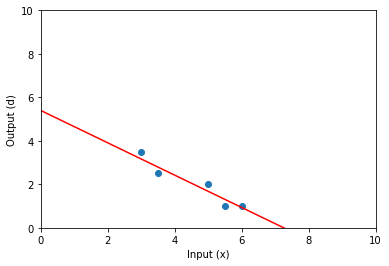

In [9]:
pts = [([3], 3.5), ([3.5], 2.5), ([5], 2), ([5.5], 1), ([6], 1)]

perceptron = RegressionPerceptron(1, weights=[2, 0], learning_rate=0.01)

f, ax = plt.subplots(1)
xdata, ydata = zip(*pts)
ax.scatter(xdata, ydata)
ax.set_ylim(ymin=0, ymax=10)
ax.set_xlim(xmin=0, xmax=10)
ax.set_ylabel("Output (d)")
ax.set_xlabel("Input (x)")

perceptron.train_epoch(xdata, ydata, epochs=1000)
w = perceptron.weights

xs = np.linspace(0, 10, 100)
ys = w[1] * xs + w[0]
plt.plot(xs, ys, "-r")
print(w)
plt.show(f)

It is evident that the gradient descent variant yield similar results.

#### Speedup
Since we required $\eta$ to be small, the learning rate will be slow.

But if we modified our $\Delta w(k)$ from

$$
\Delta w(k) = \eta \delta x
$$

to

$$
\Delta w(k) = \alpha \Delta w(k-1) + \eta \delta x
$$

where $\alpha$ is the momentum constant/forgetting factor and $\alpha \Delta w(k-1)$ is the momentum term.

This new $\Delta w$ have the property that when consecutive $\Delta w(k)$ are of the same sign, the magnitude of $\Delta w$ increases.
This means that learning will be faster as we pick up "momentum" when going down a steady gradient.

And when the signs are $\Delta w(k)$ are different, it will reduce the speed of learning, allowing the network to settle at a minimum.

**Footnote**: We can actually give different learning rates for each layer, each denoted by $\eta ^{(i)}$. However, this is unconventional.

### Termination
Notice that unlike in the classification problem, it is unlikely that the minimum error is 0 (unless the points lie in a line), thus the weights will never converge.